In [1]:
!ls

processed_prompts.csv  process_prompts.ipynb  prompts.txt  read_prompts.sh


In [2]:
file = "prompts.txt"
with open(file, "r") as f:
    lines = f.readlines()
    
lines = [line[:-2] for line in lines if line != '\n']

In [3]:
import pandas as pd
lines_df = pd.DataFrame(lines, columns=["prompts"])
lines_df

,prompts
0,"angry, pissed off, elliot rodger as anakin sky..."
1,portrait of Jenna Jameson as a character in st...
2,"mr bean in star wars, running away from storm ..."
3,Valkorion from Star War
4,"close up shot of a spheric sci fi probe, sharp..."
...,...
201,"Jennifer Lawrence, closeup, D&D, fantasy, intr..."
202,"elon musk vomiting money, high detai"
203,Architectural photography of beautiful nature ...
204,"silly goofy retro cyberpunk robot, fishing in ..."


In [4]:
lines_df["prompts"] = lines_df["prompts"].apply(lambda row:row.replace('"','')).apply(lambda row:row.replace("'",""))

In [5]:
lines_df

,prompts
0,"angry, pissed off, elliot rodger as anakin sky..."
1,portrait of Jenna Jameson as a character in st...
2,"mr bean in star wars, running away from storm ..."
3,Valkorion from Star War
4,"close up shot of a spheric sci fi probe, sharp..."
...,...
201,"Jennifer Lawrence, closeup, D&D, fantasy, intr..."
202,"elon musk vomiting money, high detai"
203,Architectural photography of beautiful nature ...
204,"silly goofy retro cyberpunk robot, fishing in ..."


In [6]:
lines_df["nb of words"] = lines_df.apply(lambda row: len(row["prompts"].split(" ")), axis=1)

In [7]:
lines_df["nb of attributes"] = lines_df.apply(lambda row: len(row["prompts"].split(",")), axis=1)

<AxesSubplot:>

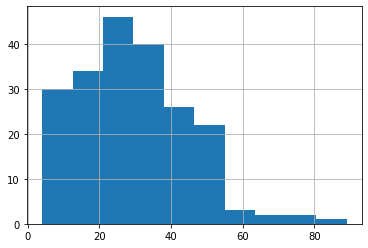

In [8]:
lines_df["nb of words"].hist()

<AxesSubplot:>

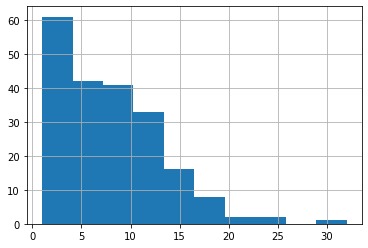

In [9]:
lines_df["nb of attributes"].hist()

In [10]:
cut_prompts = []
for prompt in lines_df["prompts"]:
    words = prompt.split(" ")
    for i in range(len(words)-1):
        cut_prompts.append(" ".join(words[:-i]))

cut_prompts = [line for line in cut_prompts if line != ""]

In [11]:
cut_df = pd.DataFrame(cut_prompts, columns=["prompts"])
cut_df["nb of words"] = cut_df.apply(lambda row: len(row["prompts"].split(" ")), axis=1)
cut_df

,prompts,nb of words
0,"angry, pissed off, elliot rodger as anakin sky...",22
1,"angry, pissed off, elliot rodger as anakin sky...",21
2,"angry, pissed off, elliot rodger as anakin sky...",20
3,"angry, pissed off, elliot rodger as anakin sky...",19
4,"angry, pissed off, elliot rodger as anakin sky...",18
...,...,...
5629,"female magician holding playing cards, esp",6
5630,"female magician holding playing cards,",5
5631,female magician holding playing,4
5632,female magician holding,3


In [12]:
nb_words = cut_df.groupby("nb of words").count()["prompts"]

In [13]:
# on garde que ceux qui ont au moins 20 mots dans leur catégorie
max_nb_words = nb_words[nb_words>20].index[-1]
max_nb_words

47

In [14]:
selected_df = cut_df[cut_df["nb of words"] < max_nb_words]

In [15]:
import random 
selected_prompts = []
for nb in range(1,max_nb_words):
    group_df = selected_df[selected_df["nb of words"]==nb]["prompts"]
    values = list(group_df.values)
    random.shuffle(values)
    selected_prompts = selected_prompts + values[:10]
selected_prompts

['giant flower',
 'uhd candid',
 'Colour Caravaggio',
 'a half',
 'Larry David',
 'a long',
 'full body',
 'a fat',
 'a highly',
 'concept art',
 'shiny aluminum rocket',
 'water with lotus',
 'photo of a',
 'Star Wars architecture,',
 'portrait of Jenna',
 'headshot of jennifer',
 'marvel rocket racoon',
 'A DJ playing',
 'A young male',
 'anime visual, portrait',
 'Star Wars themed concept',
 'Larry David as Anakin',
 'pink floyd by annie',
 'an amazing award winning',
 'two bears making sandwiches,',
 'an elaborate empty floating',
 'sobriety art by michael',
 'kim kardashian acting like',
 'portrait of a 3',
 'bearded jedi building legos',
 'a beautiful and detailed picture',
 'professional photo of giant scifi',
 'superhero spiderman in the style',
 'Larry David as Anakin Skywalker',
 'a beautiful flower field made',
 'a budgie swimming in the',
 'a full head photoshot, detailed',
 'a blue cow standing in',
 'attractive goth woman with a',
 'mr bean in star wars,',
 'sharp, highly

In [16]:
pd.DataFrame(selected_prompts).astype(str).to_csv("processed_prompts.csv", )

In [17]:
table = pd.read_csv("processed_prompts.csv").drop("Unnamed: 0", axis=1)
table.head()

,0
0,giant flower
1,uhd candid
2,Colour Caravaggio
3,a half
4,Larry David


In [21]:
table.values[0][0]

'giant flower'

In [20]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       450 non-null    object
dtypes: object(1)
memory usage: 3.6+ KB
